
# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset Overview**: This dataset contains information about 10,000 movies collected from the movie database TMDb
>
> **Questions**:

> **Q1:** Does the director of the movie affect the popularity? If yes, who is the director who has the highest popularity? and who is the director who has the lowest one?

>**Q2:** Is the release year with the highest and lowest revenue the same year with the highest and lowest budget? 

>**Q3:** How long are most of the movies?

>**Q4:** What is the relationship between revenue and budget?

In [70]:
# Import statements for all of the packages that will be used to generate and complete this report

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb


# A'magic word' so that visualizations are plotted inline with the notebook.

% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, data is loaded, cleanliness of the data is checked, and then dataset is trimmed and cleaned for analysis.

### General Properties

In [71]:
# Load data and print a few lines 

movies_df = pd.read_csv('Movies.csv')
movies_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


In [72]:
# check the dimensions of the dataframe
movies_df.shape

(10866, 21)

In [73]:
# display a summary of the dataframe and check for null values
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [74]:
# check for dublicated rows
movies_df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
10841    False
10842    False
10843    False
10844    False
10845    False
10846    False
10847    False
10848    False
10849    False
10850    False
10851    False
10852    False
10853    False
10854    False
10855    False
10856    False
10857    False
10858    False
10859    False
10860    False
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [75]:
# check for datatypes of the columns in the dataframe
movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object



> **The observations from the previous analysis**:

> 1- Some columns will not be needed in the analysis and exploration (imdb_id, budget, cast, homepage, keywords, tagline, overview, vot_average, budget_adj and revenue_adj)

> 2- There are some null values in these columns: cast, homepage, imdb_id, tagline, keywords, overview, director geners and production_companies

> 3- the datatype of "release_date" is incorrect. It is object whilw it should be date

> 4- There is no duplicated data


In [76]:
# Show the Summary Statistics of the Dataset Attributes

movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Replace this with more specific notes!)

In [77]:
# Delete the columns that will not be used later on in the next steps

delete_col=[ 'imdb_id','cast','homepage', 'tagline','keywords', 'overview','vote_average', 'budget_adj', 'revenue_adj']

movies_df= movies_df.drop(delete_col,1)

# check the dataframe after deleteing the columns
movies_df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,2015


In [78]:
# Fix the null values issue

# Remove all rows that contain null values
movies_df = movies_df.dropna()

# Check that there is no null values
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 12 columns):
id                      9807 non-null int64
popularity              9807 non-null float64
budget                  9807 non-null int64
revenue                 9807 non-null int64
original_title          9807 non-null object
director                9807 non-null object
runtime                 9807 non-null int64
genres                  9807 non-null object
production_companies    9807 non-null object
release_date            9807 non-null object
vote_count              9807 non-null int64
release_year            9807 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 996.0+ KB


In [79]:
# Fix the incorrect datatype issue by converting "release_date" from object to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Check if it is changed correctly
movies_df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
release_year                     int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: In this section, statistics and visulizations will be used to address the questions stated before in the introduction section

### Research Question 1 (The Popularity of Movies Produced By Each Director)

In [80]:
# Display the Mean of Popularity for Each Set of Movies Produced by Each Director

movies_directors = movies_df.groupby('director')['popularity'].mean().sort_values()

print(movies_directors)


director
Pascal Thomas                        0.000973
Dibakar Banerjee                     0.001115
Nacho G. Velilla                     0.001317
Stephen Cragg                        0.001423
Sarah Burns|Ken Burns                0.001783
Amol Palekar                         0.001983
Charles B. Pierce                    0.002381
Oliver Irving                        0.002514
Nicolas Castro                       0.002922
Bruce Hendricks                      0.003238
John Moffitt                         0.003432
Laurent Malaquais                    0.003611
Ricki Stern|Anne Sundberg            0.004569
Zak Levitt                           0.004575
Harry KÃ¼mel                         0.005235
Ivan CalbÃ©rac                       0.005289
Kristopher Belman                    0.005391
Ryoo Seung-wan                       0.005412
Atsuya Uki                           0.005502
Y.K. Kim|Woo-sang Park               0.005529
Kurt Engfehr                         0.005725
Jenniphr Goodman         

In [81]:
# Calculate the Highest & Lowest Popularity with the Name of the Director

print('The director with the highest popularity')
print(movies_directors.idxmax())
print(movies_directors.max())

print('The director with the lowest popularity')
print(movies_directors.idxmin())
print(movies_directors.min())


The director with the highest popularity
Colin Trevorrow
16.696886499999998
The director with the lowest popularity
Pascal Thomas
0.000973


### Research Question 2  (Revenues vs Budgets in Each Year)

In [82]:


movies_revenue = movies_df.groupby('release_year')['revenue'].sum()

print(movies_revenue)


release_year
1960      145005000
1961      337720188
1962      215579846
1963      187404989
1964      340981782
1965      458081854
1966       84736689
1967      737834637
1968      264732980
1969      243957076
1970      560221969
1971      404910610
1972      494730171
1973     1223981102
1974      812539818
1975      957489966
1976      801005600
1977     2180583159
1978     1353386659
1979     1684794913
1980     1768662387
1981     1774606236
1982     2458443852
1983     2307529320
1984     2635524418
1985     2875772392
1986     2998067061
1987     3462104847
1988     3738961360
1989     5164923718
1990     5304688679
1991     4706599796
1992     6078153217
1993     6952183499
1994     7091078403
1995     9147263541
1996     8303862070
1997    10654899590
1998     9483866799
1999    11355712579
2000    10919020206
2001    13359768166
2002    14616255816
2003    15129121970
2004    16747471351
2005    16505301325
2006    16251498200
2007    19403755169
2008    19298965733
2009   

In [83]:
# Calculate the Highest & Lowest Revenue with the Released Year


print('The release year with the highest revenue')
print(movies_revenue.idxmax())
print(movies_revenue.max())

print('The release year with the lowest revenue')
print(movies_revenue.idxmin())
print(movies_revenue.min())

The release year with the highest revenue
2015
26759924070
The release year with the lowest revenue
1966
84736689


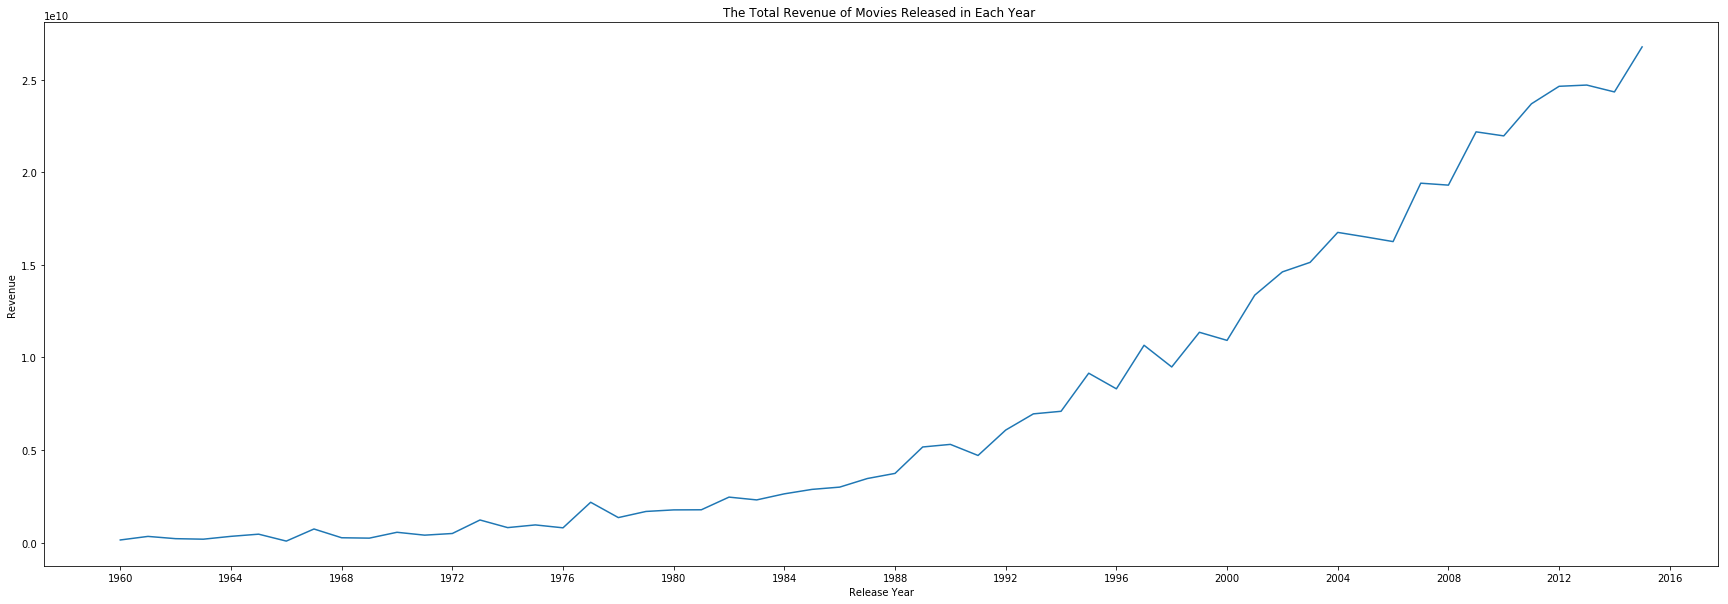

In [84]:
# Visulize the previous code (Release year vs Revenue)


plt.figure(figsize=(30,10))
plt.xticks(np.linspace(1960, 2016,15))
plt.plot(movies_revenue)
plt.title('The Total Revenue of Movies Released in Each Year ')
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.show()


In general, the plot shows that revenue increases as release year increases. Approximately, the big increase in revenue happend in 1988

The highest revenue is gained in 2015 while the lowest is gained in 1966


In [85]:
# Display the Sum of Budgets for Each Set of Movies Released in Each Year


movies_budget = movies_df.groupby('release_year')['budget'].sum().sort_values()

print(movies_budget)

release_year
1960      22056948
1972      36279254
1964      39483161
1969      42129087
1961      46137000
1962      54722126
1975      56279000
1966      57554800
1973      65190783
1965      70205115
1968      71939000
1963      73331500
1971      75997000
1974      76970000
1967     100652200
1976     122150000
1970     126961946
1977     161580000
1978     208997011
1979     254814000
1981     338757786
1980     362500000
1982     437795002
1983     518007412
1986     693711113
1987     709455811
1984     729211964
1985     748720637
1988     922848000
1989    1079656360
1990    1278354025
1992    1437325538
1991    1466233000
1993    1777628653
1994    2220207032
1995    2831884377
1996    3671080000
1998    4493160000
1997    4751086675
2001    5619029000
2000    5736200000
1999    5745235106
2002    5830640255
2003    6225857394
2004    7071090222
2006    7241085300
2005    7294284349
2015    7591947557
2007    7593852112
2008    7714912597
2014    7908350738
2012    8257783942

In [86]:
# Calculate the Highest & Lowest Budget with the Released Year


print('The release year with the highest budget')
print(movies_budget.idxmax())
print(movies_budget.max())

print('The release year with the lowest budget')
print(movies_budget.idxmin())
print(movies_budget.min())

The release year with the highest budget
2010
9361845996
The release year with the lowest budget
1960
22056948


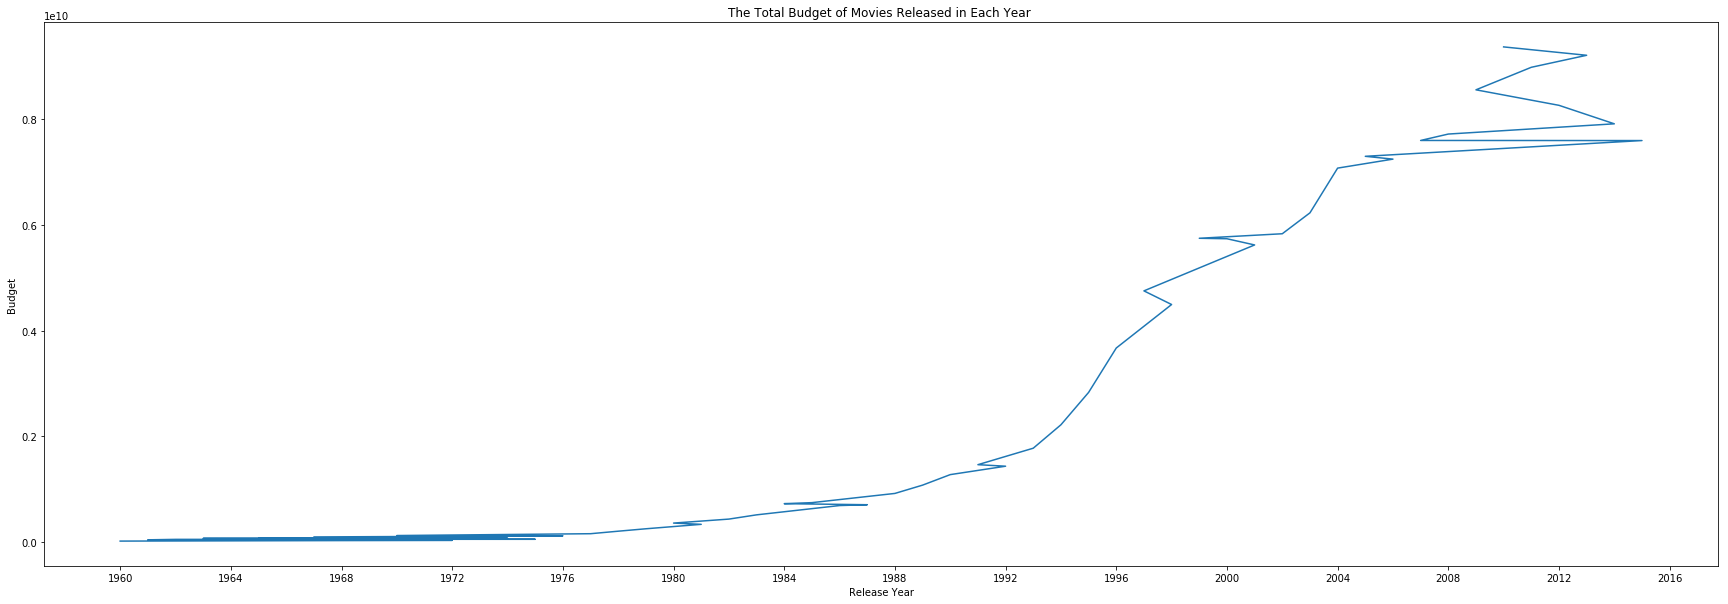

In [87]:
# Visulize the previous code (Release year vs Budget)


plt.figure(figsize=(30,10))
plt.xticks(np.linspace(1960, 2016,15))
plt.plot(movies_budget)
plt.title('The Total Budget of Movies Released in Each Year ')
plt.xlabel('Release Year')
plt.ylabel('Budget')
plt.show()



In general, the plot shows that budget increases as release year increases. Approximately, the big increase in budget happend in 1990

The highest budget is spent in 2010 while the lowest is spent in 1960


### Research Question 3  (Number of Movies in Each Year)


In [88]:
# Display the count of runtime for all movies

movies_runtime = movies_df['runtime'].value_counts().sort_values
print(movies_runtime)

<bound method Series.sort_values of 90     468
95     316
100    303
93     294
97     285
96     281
91     273
94     264
98     251
88     246
92     240
105    233
102    219
101    218
89     217
99     215
85     197
108    197
103    196
104    193
106    191
87     188
110    185
107    180
86     172
112    146
113    134
109    132
111    128
84     123
      ... 
32       1
24       1
200      1
336      1
216      1
500      1
34       1
193      1
42       1
194      1
210      1
242      1
338      1
19       1
51       1
223      1
219      1
235      1
28       1
36       1
49       1
33       1
236      1
17       1
292      1
300      1
352      1
233      1
372      1
247      1
Name: runtime, Length: 226, dtype: int64>


Text(0,0.5,'Frequency')

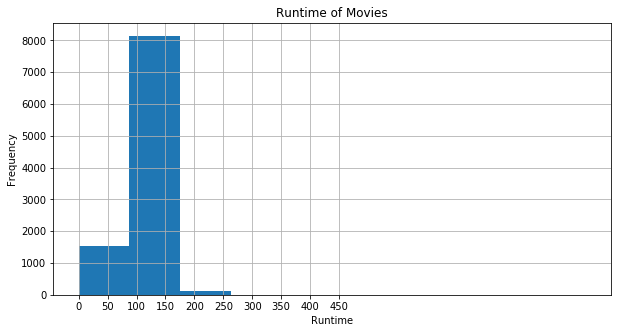

In [89]:
# visulize the previous code (Runtime of Movies)

movies_df['runtime'].hist(figsize=(10,5))
plb.xticks(range(0, 500, 50))
plt.title('Runtime of Movies')
plt.xlabel('Runtime')
plt.ylabel('Frequency')

The histogram shows that the the peak of data approximately occurs at 90-160 minutes and the peak represents the most runtime value of the movies. That means that most movies are about 90 to 160 minutes.


### Research Question 4  (The Relationship Between Revenue & Budget)



Text(0.5,1,'The Relationship between Revenue & Budget')

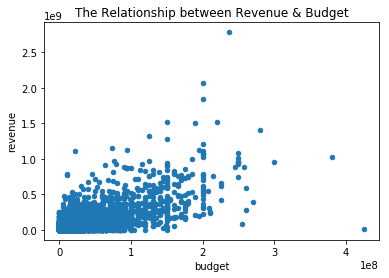

In [90]:
# Display the relationship between revenue & budget using scatter plot
movies_df.plot(x='budget', y='revenue', kind='scatter')
plt.title('The Relationship between Revenue & Budget')

The Scatter Plot Shows That There is a Weak Positive Relationship Between Revenue & Budget Variables. 

<a id='conclusions'></a>
## Conclusions

**The conclusion made from the first research question:**

The movies that have the highest average of popularity are produced by director: Colin Trevorrow
The movies that have the lowest average of popularity are produced by director: Pascal Thomas

**The conclusion made from the second research question:**

The release year with the highest/lowest revenue is different that the release year with the highest/lowest budget

The highest revenue is gained in 2015 while the highest budget is spent in 2010

The lowest revenue is gained in 1966 while the lowest budget is spent in 1960

**The conclusion made from the third research question:**

Most of the movies are about 90 to 160 minutes

**The conclusion made from the fourth research question:**

There is a weak positive relationship between revenue & budget variables


**The Limitations I Faced While Working in the Project & How They Were Solved**

1- There were a lot of unused attributes (Not Important in the Analysis) > There were all deleted

2- There were a lot of null values > All rows with null values were deleted

3- Just one attribute was with incorrect type (release_year) > It was sucessfully changed to the correct data type